**Using the mtcars dataset, predict a car’s fuel efficiency (miles per gallon).**

In [1]:
# Import prerequisite libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import pearsonr

In [2]:
# Load data as data frame
cars = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


The mtcars dataset is a built-in R dataset featuring 32 observations (1973 - 74 car models) and 11 variables related to automobile design and performance.

**Key Data Details**

Observations: 32 (various car models)

Variables: 11

Origin: 1974 Motor Trend US Magazine

**Variables**

* mpg: Miles/(US) gallon
* cyl: Number of cylinders
* disp: Displacement in cubic inches
* hp: Gross horsepower
* drat: Driveshaft ratio
* wt: Weight in 1000s of lbs.
* qsec: Quarter mile time
* vs: Engine shape (0 = V-shaped, 1 = straight)
* am: Transmission (0 = automatic, 1 = manual)
* gear: Number of forward gears
* carb: Number of carburetors


In [3]:
cars.shape
# With only 32 records, this is a small dataset

(32, 11)

In [4]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


**Note**
* There are no missing values
* All variables are represented numerically, but not all of them are on a numerical scale. (See vs and am)

In [5]:
# split predictors and outcome
X = cars.drop(['mpg'], axis=1)
y = cars['mpg']

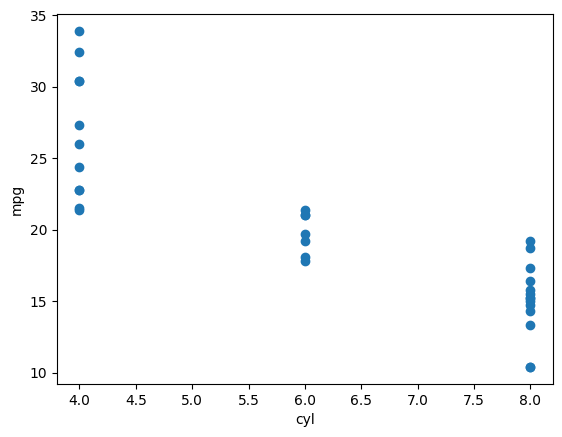

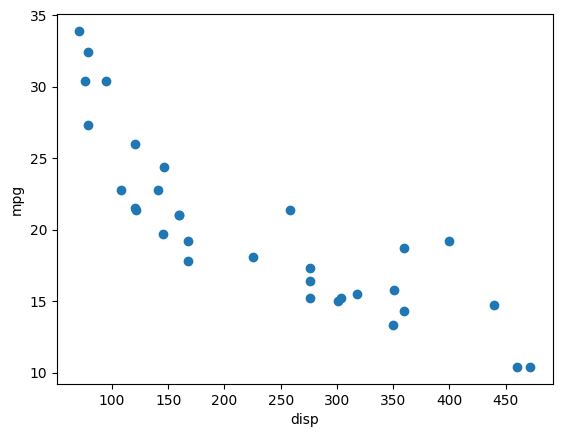

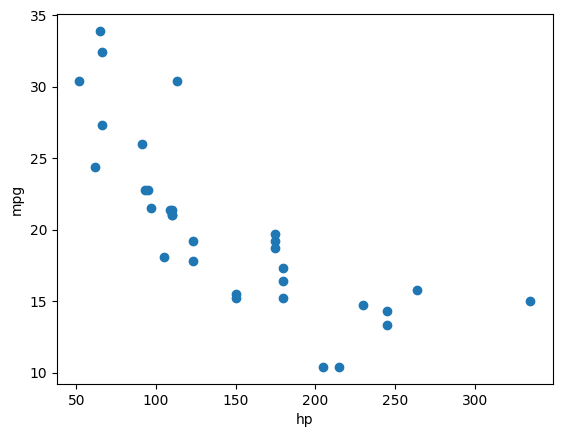

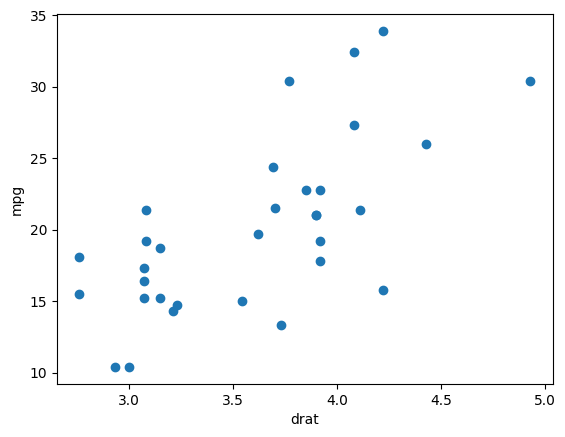

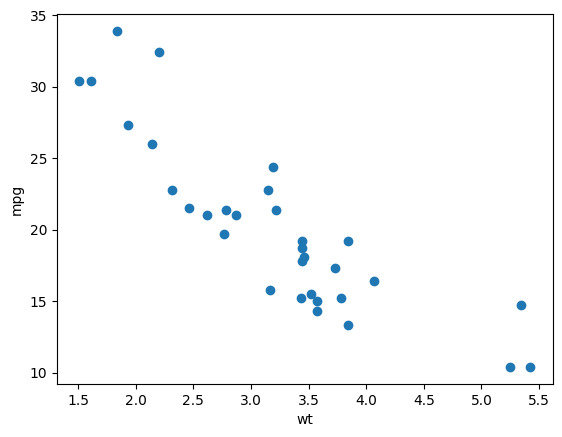

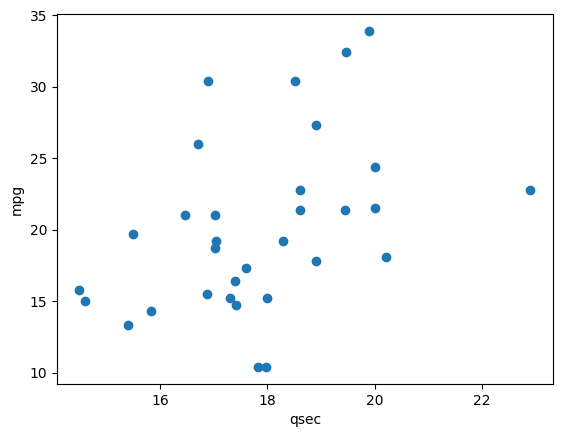

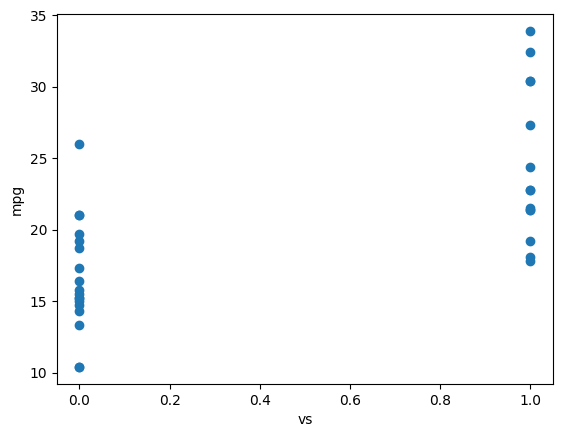

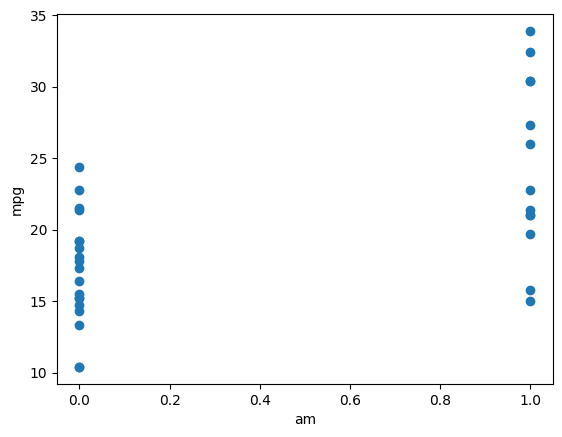

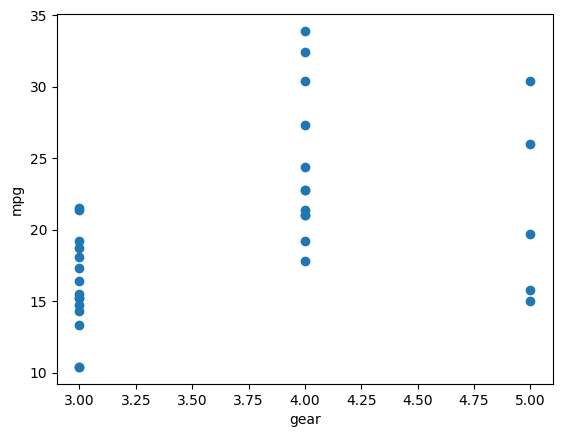

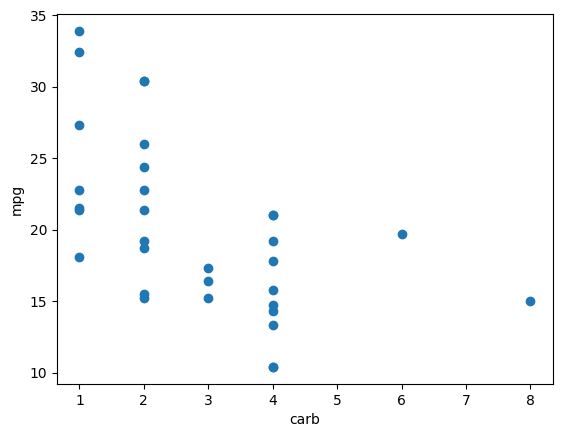

In [6]:
# Check for a linear relationship between each feature and the outcome using scatter diagrams
for feature in X.columns:
    plt.scatter(cars[feature], cars['mpg'])
    plt.xlabel(feature)
    plt.ylabel('mpg')
    plt.show()

In [7]:
# Check for the strength and significance of linear relationship between each feature and the outcome using scatter diagrams
features = []
coefficients = []
p_values = []
for feature in X.columns:
    correlation_coefficient, p_value = pearsonr(X[feature], y)
    correlation_coefficient = round(correlation_coefficient, 3)
    p_value = round(p_value, 3)
    features.append(feature)
    coefficients.append(correlation_coefficient)
    p_values.append(p_value)

In [8]:
cor_df = pd.DataFrame({'Feature':features, 'Coefficient':coefficients, 'P-Value':p_values})
cor_df
# all coefficients are greater than 0.3 and significant

,Feature,Coefficient,P-Value
0,cyl,-0.852,0.000
1,disp,-0.848,0.000
2,hp,-0.776,0.000
3,drat,0.681,0.000
4,wt,-0.868,0.000
5,qsec,0.419,0.017
6,vs,0.664,0.000
7,am,0.600,0.000
8,gear,0.480,0.005
9,carb,-0.551,0.001


In [9]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1)

In [10]:
# create model object
cars_lm = LinearRegression()

In [11]:
# train model
cars_lm.fit(X_train, y_train)

LinearRegression()

In [12]:
# extract model intercept
beta_0 = round(float(cars_lm.intercept_),3)
beta_0

8.465

In [13]:
# extract model coefficients
beta_js = cars_lm.coef_.round(3)
beta_js
# we can't easily match coefficient to feature

array([ 0.19 ,  0.009, -0.023,  1.477, -3.565,  0.924, -1.249,  1.341,
        0.482, -0.187])

In [14]:
# put coefficients in a dataframe
beta_js_df = pd.DataFrame(beta_js, X.columns, columns=['Coefficient'])
beta_js_df

,Coefficient
cyl,0.190
disp,0.009
hp,-0.023
drat,1.477
wt,-3.565
qsec,0.924
vs,-1.249
am,1.341
gear,0.482
carb,-0.187


In [15]:
y_pred = cars_lm.predict(X_train)

In [16]:
print(f'MSE (train): {metrics.mean_squared_error(y_train, y_pred)}')
print(f'RMSE (train): {np.sqrt(metrics.mean_squared_error(y_train, y_pred))}')
print(f'RSS (train): {(metrics.mean_squared_error(y_train, y_pred))
                      *len(y_train)}')
print(f'R squared (train): {metrics.r2_score(y_train, y_pred)}')

MSE (train): 3.737534471838153
RMSE (train): 1.9332704083594083
RSS (train): 93.43836179595382
R squared (train): 0.8576134817954886


In [17]:
y_pred_test = cars_lm.predict(X_test)

In [18]:
print(f'MSE (test): {metrics.mean_squared_error(y_test, y_pred_test)}')
print(f'RMSE (test): {np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}')
print(f'RSS (test): {(metrics.mean_squared_error(y_test, y_pred_test))
                     *len(y_test)}')
print(f'R squared (test): {metrics.r2_score(y_test, y_pred_test)}')

MSE (test): 11.520900928066704
RMSE (test): 3.394245266339294
RSS (test): 80.64630649646692
R squared (test): 0.8036833802310253


The RSS is not a good measure for comparing models with different numbers of observations.

MSE and R-squared indicate that the model fits the training data better than the test data. This indicates *overfitting*